<a href="https://colab.research.google.com/github/Nutsudapenpong/DPDM/blob/master/Pandas_and_Data_Preprocessing_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


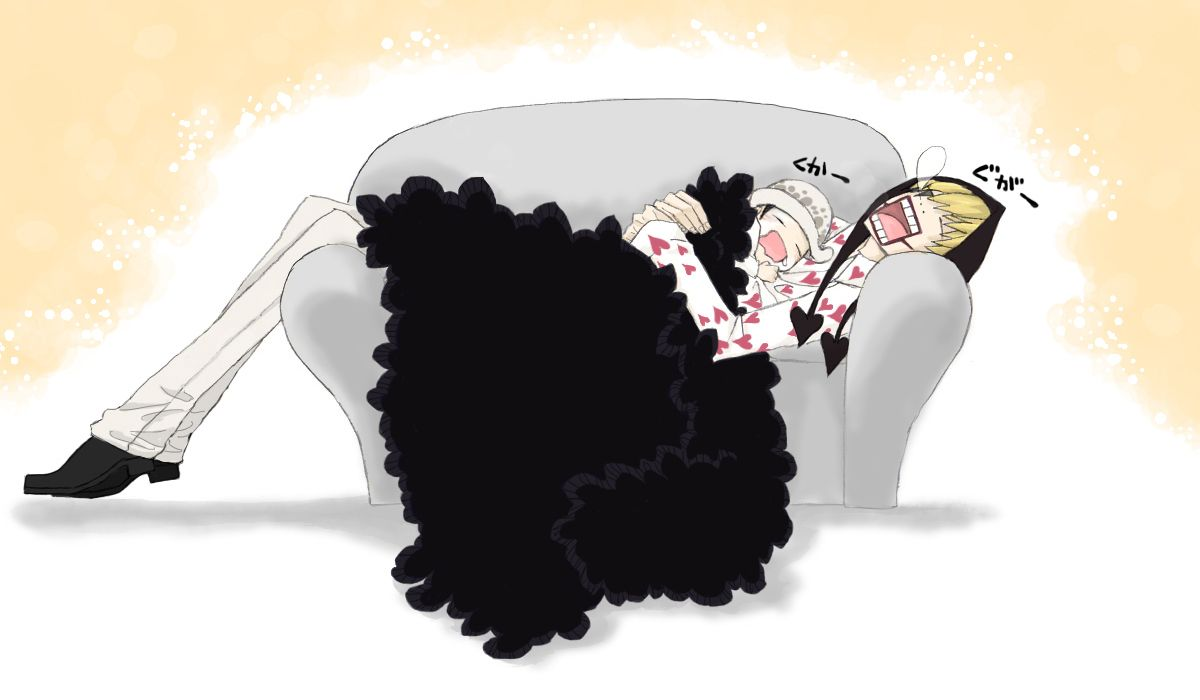



In [81]:
import pandas 

In [82]:
# connect with google drive
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/DWDM_material'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import os

In [84]:
search_click = os.path.join(path, 'search_click.csv')
w_restaurant = os.path.join(path, 'w_restaurant.csv')

In [85]:
# ใช้ pandas โหลดข้อมูลเข้สมายัง environment
search_click_df = pandas.read_csv(search_click)

In [86]:
search_click_df.head()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True


In [87]:
w_restaurant_df = pandas.read_csv(w_restaurant)
w_restaurant_df.head()

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


In [88]:
# เช็คว่ามิติของมันถูกต้องเหมือนที่อธิบายไว้ในไฟล์อธิบายข้อมูลรึป่าว โดยการดูรูปร่างของตารางข้อมูล
search_click_df.shape # แถวกับคอลัมตามลำดับ

(1048575, 6)

In [89]:
w_restaurant_df.shape

(246847, 32)

In [90]:
search_click_df.shape[0] # ถ้าอยากได้ตัวเลขไปใช้ เช่น จำนวนข้อมูล จำนวน feature ของข้อมูล เป็นต้น

1048575

In [91]:
# 0.ชี้ข้อมูลในตาราง

Normal indexing

In [92]:
search_click_df['search_id'] #เลือกเอาข้อมูลที่ต้องการจากการเลือกชื่อหัวตาราง

0          5c004472-5ecc-4159-9698-9f329b8e26e1
1          5f34eca0-c04e-4c10-b600-54aa447dbd8e
2          8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3          1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4          6bc75e0d-fc65-471e-9926-ff6be6708639
                           ...                 
1048570    99aab616-6fc5-4fbf-994b-4aebee7bb360
1048571    d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a
1048572    4c1de7fe-300e-41aa-9d01-914344fc3753
1048573    2ec0ddec-e450-4b98-9779-42b77aa7eda5
1048574    5741d9cf-b9f1-441d-aa83-d2b0179bf874
Name: search_id, Length: 1048575, dtype: object

In [93]:
search_click_df['search_id'][0] #เลือกแถว

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [94]:
w_restaurant_df[['name', 'city_name', 'weighted_average_rating']] # เลือกเอาคอลัมที่ต้องการ

,name,city_name,weighted_average_rating
0,นครินทร์ทันตกรรม,Samut Songkhram,5.000000
1,Corner House,Bangkok Metropolitan Region,2.000000
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,4.000000
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,0.000000
4,Buono Caffe,Bangkok Metropolitan Region,3.738462
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,3.663522
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,0.000000
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,4.000000
246845,Mom Made,Nakhon Si Thammarat,5.000000


In [95]:
search_click_df.iloc[0,1] #ตัวหน้าแถวกับคอลัมตามลำดับ อันนี้มันจะมองข้อมูลของเราเป็นเมทริกซ์

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [96]:
search_click_df.iloc[:10,:2] #เลือกถึงแถวที่ 10 และ คอลัมแรกถึงคอลัมที่ 2

,click_timestamp,search_id
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639
5,48:16.7,92ea02ba-2c89-4efd-973c-e23526c531de
6,39:18.4,79d61918-fb3e-4181-99b6-7a7abddfcdb1
7,33:39.0,7f8b2b57-dea1-4fe1-84c8-5a7d63750e47
8,07:48.3,3d9217bb-3eae-42b5-8cf3-a756efae2cfa
9,41:25.4,a2cb0d41-6e1f-4169-9140-cb671fbb41dc


1.Missing Values

In [97]:
search_click_df.isnull() #เช็ค Missing value จะเจอคำว่า True NAN NA  มันคือ Missing value

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1048570,False,False,False,False,False,False
1048571,False,False,False,False,False,False
1048572,False,False,False,False,False,False
1048573,False,False,False,False,False,False


In [98]:
 #สรุปยอดแบบคอลัมว่าเจออะไรไหม แบบที่จำทุกค่ามา or กัน ถ้าเอามา and กันจะเป็น .all()search_click_df.isnull().any()

In [99]:
search_click_df.isnull().any().any() #or ค่าของตาราง search_click_df.isnull().any()

True

Handling missing values 1

In [100]:
# ลบข้อมูลที่มี Missing ออกทั้งแถว
search_click_df_nm = search_click_df.dropna()

In [101]:
search_click_df_nm.isnull().any().any() # เช็คว่ามี Missing ไหม

False

In [102]:
print(search_click_df.shape)  #จำนวนแถวทั้งหมด
print(search_click_df_nm.shape) #จำนวนแถวที่ตัด Missing ออกแล้ว

(1048575, 6)
(1048206, 6)


In [103]:
search_click_df.shape[0] - search_click_df_nm.shape[0] #จำนวนที่โดนตัดออก

369

Excercise 1 ตรวจสอบว่า การลบข้อมูล missing ออก
จากตาราง w_restaurant จะทำให้ข้อมูลลดลงกี่ %

In [104]:
w_restaurant_df_nm = w_restaurant_df.dropna()

In [105]:
((w_restaurant_df.shape[0] - w_restaurant_df_nm.shape[0] )*100)/w_restaurant_df.shape[0] # ดังนั้นไม่สมควรใช้วิธีการตัดออก

99.99837956304917

In [106]:
w_restaurant_df.isnull().any() #เช็คค่า missing ว่ามีไหม

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains            True
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_restaurant            True
pet_friend

In [107]:
w_restaurant_df.dropna(subset=['id', 'name', 'avg_price']).shape #dropแค่คอลัมที่สนใจ

(4572, 32)

In [108]:
w_rest_dropped_avgprice = w_restaurant_df.dropna(subset=['id', 'name', 'avg_price']) 
w_rest_dropped_avgprice

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
11,27,แพอาหารธาราบุรี,1,0,Kanchanaburi,71000,w4qzbb4,0,3.568245,NaN,107.0,34,3,22277,26,0,0,Thai,3.0,375.0,3.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
67,123,เล็กกุ้งเผา,1,0,Bangkok Metropolitan Region,10310,w4rw9mc,0,3.685552,NaN,272.0,29,7,28697,26,0,15,Thai,3.0,375.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,175,ใต้ต้นมะม่วง,1,0,Phuket,83000,w1muz5d,0,3.857143,NaN,17.0,15,2,3278,6,0,3,Thai,1.0,50.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN
129,262,Oniku Shabushabu & Yakiniku,1,0,Surat Thani,84000,w1weuxg,0,3.633588,NaN,40.0,19,2,10349,7,0,11,Sukiyaki/Shabu,3.0,375.0,3.0,1.0,1.0,1.0,1.0,NaN,1.0,5.0,NaN,0.0,NaN,1.0
134,271,Cafe Cha,1,0,Bangkok Metropolitan Region,10300,w4rqrhf,0,4.094527,NaN,251.0,12,0,17775,11,0,7,Café/Coffee Shop,4.0,175.0,3.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246472,339464,The Andaman,1,0,Bangkok Metropolitan Region,10110,w4rw0ep,0,3.954217,NaN,137.0,30,0,24762,19,0,3,French,4.0,1500.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
246508,339506,ZEN Japanese Restaurant,1,0,Bangkok Metropolitan Region,10900,w4rw871,0,3.500358,42.0,66.0,89,20,26464,49,16,37,Japanese,3.0,375.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246660,339686,หมี่น้ำกุ้ง,1,0,Phuket,83000,w1muycu,0,4.000000,NaN,41.0,10,1,4922,6,0,1,Noodles,1.0,50.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN
246666,339692,ต้นเครื่อง,1,0,Bangkok Metropolitan Region,NaN,w4rw0sv,0,3.891923,NaN,513.0,53,3,62844,40,12,40,Thai,3.0,375.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,1.0


In [109]:
w_restaurant_df.dropna(subset=['id', 'name', 'avg_price'])['avg_price'].mean()  #การพิมพ์ต่อได้เลย

327.44728783902013

Method 2 (replace with reasonable value)

แทนค่า number of chain ด้วยเลข 0

In [110]:
w_restaurant_df[['number_of_chains']] = w_restaurant_df[['number_of_chains']].fillna(0) #เติมศูนย์เพราะคนส่วนใหญ่เอาเลขไรก็เอาเลขนั้น

In [111]:
w_restaurant_df.isnull().any()

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains           False
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_restaurant            True
pet_friend

Method 2.1 (replace with unknown value)

In [112]:
w_restaurant_df[['number_of_chains']] = w_restaurant_df[['number_of_chains']].fillna('unknown')

In [113]:
w_restaurant_df.isnull().any()

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains           False
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_restaurant            True
pet_friend

Method 2.2 (replace with mean)

Method 3

In [114]:
new_table = w_restaurant_df[['name', 'city_name', 'avg_price']]
new_table

,name,city_name,avg_price
0,นครินทร์ทันตกรรม,Samut Songkhram,NaN
1,Corner House,Bangkok Metropolitan Region,NaN
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,NaN
246845,Mom Made,Nakhon Si Thammarat,NaN


In [115]:
# [PD] select data
selected_list = new_table['city_name'] == 'Bangkok Metropolitan Region' #เช็คว่าค่าไหนเท่ากับอันที่เราอยากได้บ้างแล้วเอามาเป็นตารางใหม่
selected_list 

0         False
1          True
2         False
3          True
4          True
          ...  
246842     True
246843     True
246844     True
246845    False
246846    False
Name: city_name, Length: 246847, dtype: bool

In [116]:
new_table[selected_list].head() #เอาไปใส่เป็น index ของตารางที่ต้องการจะเลือก

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN


In [117]:
new_table[new_table['city_name'] == 'Bangkok Metropolitan Region'] #แบบรวมสองบรรทัดเป็นบรรทัดเดียว

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN
...,...,...,...
246835,ร้านครัวแกงป่า,Bangkok Metropolitan Region,NaN
246840,โตข้าวต้มปลา,Bangkok Metropolitan Region,NaN
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN


หาค่าเฉลี่ยของร้านในจังหวัดกรุงเทพ

In [118]:
new_table[new_table['city_name'] == 'Bangkok Metropolitan Region'].dropna()['avg_price'].mean()

392.5854715094968

1. เลือกเฉพาะกรุงเทพ

In [119]:
bkk_table = new_table[new_table['city_name']=='Bangkok Metropolitan Region']
bkk_table.head()

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN


2. ลบ Missing

In [120]:
bkk_table_dp = bkk_table.dropna()
bkk_table_dp.head()

,name,city_name,avg_price
67,เล็กกุ้งเผา,Bangkok Metropolitan Region,375.0
134,Cafe Cha,Bangkok Metropolitan Region,175.0
247,Masterpiece clinic,Bangkok Metropolitan Region,1500.0
319,Chaba Nails & Eyelashes Pro,Bangkok Metropolitan Region,375.0
382,Panlee Bakery,Bangkok Metropolitan Region,175.0


3.เลือกเฉพาะ column 'avg_price'

In [121]:
bkk_table_dp_avg_price = bkk_table_dp['avg_price']
bkk_table_dp_avg_price

67         375.0
134        175.0
247       1500.0
319        375.0
382        175.0
           ...  
246458      50.0
246472    1500.0
246508     375.0
246666     375.0
246721     375.0
Name: avg_price, Length: 3001, dtype: float64

4.หาค่าเฉลี่ย

In [122]:
bkk_table_dp_avg_price.mean()

392.5854715094968

แก้ missing method 3 เติมค่าที่เหมาะสมตามกลุ่มของมัน

In [123]:
bkk_table[['avg_price']] = bkk_table[['avg_price']].fillna(bkk_table_dp_avg_price.mean())
bkk_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,392.585472
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,392.585472
4,Buono Caffe,Bangkok Metropolitan Region,392.585472
7,Sazanami,Bangkok Metropolitan Region,392.585472
10,Rotee Me Chabu,Bangkok Metropolitan Region,392.585472


In [124]:

#bkk_table[['avg_price']].fillna(bkk_table_dp_avg_price.mean(),inplace=True)
#bkk_table.head()

หาราคาเฉลี่ยของร้านในจังหวัดภูเก็ต และ ก็เติมค่าลงใน missing ของจังหวัดภูเก็ต

In [125]:
bkk_table = new_table[new_table['city_name']=='Phuket']
bkk_table 

,name,city_name,avg_price
53,เดอะฟอร์เต้ไอซ์แลนด์,Phuket,NaN
74,ร้านอาหารในยางปาร์ค,Phuket,NaN
91,ใต้ต้นมะม่วง,Phuket,50.0
96,อาหารเกาหลีชินจอง,Phuket,NaN
190,ไชน่าอินน์,Phuket,NaN
...,...,...,...
246688,สวนอาหารน้องเพ็ญ,Phuket,NaN
246707,เจ๊หมวย ก๋วยเตี๋ยวหมูสูตรเด็ด,Phuket,NaN
246746,พิพิธภัณฑ์ภูเก็ตไทยหัว,Phuket,NaN
246759,Outing Ground,Phuket,NaN


In [126]:
bkk_table_dropped = new_table[new_table['city_name']=='Phuket'].dropna()
bkk_table_dropped

,name,city_name,avg_price
91,ใต้ต้นมะม่วง,Phuket,50.0
470,Ang Ku Tea House,Phuket,175.0
1552,ตู้กับข้าว,Phuket,175.0
1779,บุญรัตน์ ติ่มซำ,Phuket,50.0
2080,โพงพางซีฟู้ด,Phuket,375.0
...,...,...,...
244655,ขนมจีนป้ามัย,Phuket,50.0
245848,ก๋วยเตี๋ยวเนื้อวัวรับอรุณ,Phuket,50.0
245935,T-din Cafe,Phuket,50.0
246093,House,Phuket,50.0


In [127]:
bkk_table_dropped_avrprice = new_table[new_table['city_name']=='Phuket'].dropna()['avg_price'].mean()
bkk_table_dropped_avrprice 
# ของตัวเองถึงแค่นี้

181.4814814814815

In [128]:
pk_table = new_table[new_table['city_name']=='Phuket']
pk_table[['avg_price']] = pk_table[['avg_price']].fillna(new_table[new_table['city_name']=='Phuket'].dropna()['avg_price'].mean())
pk_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
53,เดอะฟอร์เต้ไอซ์แลนด์,Phuket,181.481481
74,ร้านอาหารในยางปาร์ค,Phuket,181.481481
91,ใต้ต้นมะม่วง,Phuket,50.000000
96,อาหารเกาหลีชินจอง,Phuket,181.481481
190,ไชน่าอินน์,Phuket,181.481481


In [129]:
ch_table = new_table[new_table['city_name']=='Chon Buri']
ch_table[['avg_price']] = ch_table[['avg_price']].fillna(new_table[new_table['city_name']=='Chon Buri'].dropna()['avg_price'].mean())
ch_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
5,บ้านมุมสบาย,Chon Buri,283.547619
15,The Rabbit หมูกระทะนานาชาติ,Chon Buri,283.547619
42,ก๋วยเตี๋ยวเป็ด ณ.พัทยา,Chon Buri,283.547619
45,ซันเซ็ทพาร์ครีสอร์ตแอนด์สปา,Chon Buri,283.547619
68,Oldies Bar & Bistro,Chon Buri,283.547619


[PD] ต่อตารางในแนวแกน Y (เพิ่มจำนวน data) pd.concat

In [130]:
pandas.concat([bkk_table,pk_table,ch_table]).isnull().any()

name         False
city_name    False
avg_price     True
dtype: bool

Looping (concat)
1. ดึงจังหวัดที่มีอยู่ทั้งหมดในตารางออกมา

In [131]:
all_cities = set(new_table['city_name'])
print(len(all_cities))
#all_cities

479


2. จะคำนวณค่า mean ของ column 'city_name' เพื่อเก็บไว้เติมใส่
เมืองที่เป็น missing ทุกร้าน

In [132]:
all_mean = new_table.dropna(subset=['avg_price'])['avg_price'].mean()
all_mean

327.44728783902013


3. สร้าง list ของตารางของทุกๆจังหวัด

In [133]:
all_cities_list = []
for each_city in sorted(list(all_cities)):
    temp_table = new_table[new_table['city_name']==each_city]
    temp_table[['avg_price']] = temp_table[['avg_price']].fillna(new_table[new_table['city_name']==each_city].dropna()['avg_price'].mean())
    all_cities_list.append(temp_table)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [134]:
no_missing = pandas.concat(all_cities_list).fillna(all_mean)
no_missing.head()

,name,city_name,avg_price
56391,Smoking Doll Nation Galleria,Abu Dhabi,327.447288
67914,PRET TO GO (Terminal 1),Abu Dhabi,327.447288
123536,Keway Mai,Abu Dhabi,327.447288
142972,La Brioche,Abu Dhabi,327.447288
223144,White Dot Table,Abu Dhabi,327.447288


In [135]:
index_list = no_missing['avg_price']>1000
no_missing[index_list]

,name,city_name,avg_price
247,Masterpiece clinic,Bangkok Metropolitan Region,1500.0
3022,J'AIME by Jean-Michel Lorain,Bangkok Metropolitan Region,1500.0
4798,Xin Tian Di,Bangkok Metropolitan Region,1500.0
5804,P10 Clinic ( Surgery Cosmetic ),Bangkok Metropolitan Region,1500.0
7186,THYME Eatery&Bar,Bangkok Metropolitan Region,1500.0
...,...,...,...
62474,Acqua,Phuket,1500.0
160729,Haven Love Cake By Love Andaman,Phuket,1500.0
221495,Panache (Angsana Villa Reaort Phuket),Phuket,1500.0
57063,Jahn restaurant @Conrad Koh samui,Surat Thani,1500.0


Smooth data (binning)

HW10 ทำ Binning smooth by mean ค่า 'avg_price' ในตาราง no_missing (bins = 50)

Remove Outlier (boxplot)

Deduplication (sampling vs PCA)

Data Integration (combine 2 tables vs copy some columns from another table)

In [136]:
sorted_no_missing = no_missing.sort_values('avg_price') #HW10 เริ่มด้วยการ sort data by avg
sorted_no_missing 

,name,city_name,avg_price
58579,รามคลินิกแพทย์,Bangkok Metropolitan Region,0.0
139618,Klong Lat Mayom floating market,Bangkok Metropolitan Region,0.0
18161,ดรีมเวิลด์,Bangkok Metropolitan Region,0.0
167551,ทรีท็อปแอดเวนเจอร์พาร์ค กาญจนบุรี,Kanchanaburi,4.0
204196,โภชนากร หนองมน,Chon Buri,11.0
...,...,...,...
8130,Dine In The Dark,Bangkok Metropolitan Region,1500.0
22942,BMC CLINIC,Bangkok Metropolitan Region,1500.0
168720,Bo.lan,Bangkok Metropolitan Region,1500.0
8598,หมอศรัณย์ (คลินิกศัลยกรรมนายแพทย์ศรัณย์),Bangkok Metropolitan Region,1500.0


In [137]:
import math

In [138]:
each_bin = sorted_no_missing.shape[0]/50 #binning
print(math.ceil(each_bin))

4937


In [139]:
for i in range(50):
    this_mean = sorted_no_missing.iloc[i*math.ceil(each_bin):i*math.ceil(each_bin)+math.ceil(each_bin),:]['avg_price'].mean()
    sorted_no_missing.iloc[i*math.ceil(each_bin):i*math.ceil(each_bin)+math.ceil(each_bin),:]['avg_price']=this_mean
sorted_no_missing

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,city_name,avg_price
58579,รามคลินิกแพทย์,Bangkok Metropolitan Region,110.607177
139618,Klong Lat Mayom floating market,Bangkok Metropolitan Region,110.607177
18161,ดรีมเวิลด์,Bangkok Metropolitan Region,110.607177
167551,ทรีท็อปแอดเวนเจอร์พาร์ค กาญจนบุรี,Kanchanaburi,110.607177
204196,โภชนากร หนองมน,Chon Buri,110.607177
...,...,...,...
8130,Dine In The Dark,Bangkok Metropolitan Region,476.661359
22942,BMC CLINIC,Bangkok Metropolitan Region,476.661359
168720,Bo.lan,Bangkok Metropolitan Region,476.661359
8598,หมอศรัณย์ (คลินิกศัลยกรรมนายแพทย์ศรัณย์),Bangkok Metropolitan Region,476.661359


In [140]:
sorted_no_missing.iloc[246845:246850,:]

,name,city_name,avg_price
8598,หมอศรัณย์ (คลินิกศัลยกรรมนายแพทย์ศรัณย์),Bangkok Metropolitan Region,476.661359
100459,Paichaoclinic ไป๋เฉ่าสหคลินิก,Bangkok Metropolitan Region,476.661359


Remove Outlier (boxplot)

In [141]:
from matplotlib import pyplot as plt

{'boxes': [<matplotlib.lines.Line2D at 0x7f35e5305588>],
 'caps': [<matplotlib.lines.Line2D at 0x7f35e5305f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f35e5317a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f35e53176d8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f35e5305898>,
  <matplotlib.lines.Line2D at 0x7f35e5305c18>]}

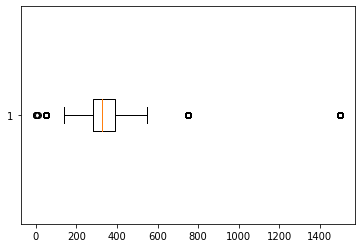

In [142]:
plt.boxplot(no_missing['avg_price'],vert=False)

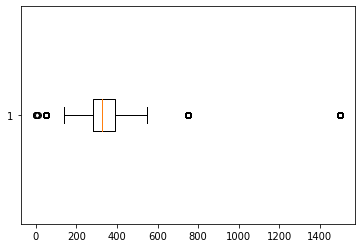

In [143]:
ret = plt.boxplot(no_missing['avg_price'],vert=False) # เอากราฟมาใส่ตัวแปล

In [144]:
ret['boxes'][0].get_xdata() #แสดงค่าออกมา

array([283.54761905, 283.54761905, 392.58547151, 392.58547151,
       283.54761905])

In [145]:
ret['whiskers'] #ดูค่า whiskers

In [146]:
print(ret['whiskers'][0].get_xdata()) #ค่า whiskers ฝั่งซ้าย
print(ret['whiskers'][1].get_xdata()) #ค่า whiskers ฝั่งขวา

[283.54761905 138.15789474]
[392.58547151 549.        ]


In [147]:
no_outlier_no_missing = no_missing[no_missing['avg_price']>=ret['whiskers'][0].get_xdata()[1]]
no_outlier_no_missing = no_outlier_no_missing[(no_outlier_no_missing['avg_price']<=ret['whiskers'][1].get_xdata()[1])]

In [148]:
no_outlier_no_missing

,name,city_name,avg_price
56391,Smoking Doll Nation Galleria,Abu Dhabi,327.447288
67914,PRET TO GO (Terminal 1),Abu Dhabi,327.447288
123536,Keway Mai,Abu Dhabi,327.447288
142972,La Brioche,Abu Dhabi,327.447288
223144,White Dot Table,Abu Dhabi,327.447288
...,...,...,...
246412,ครัวข้าวสวย,เขาใหญ่,327.447288
246418,ร้านอาหารดาวเดือน,เขาใหญ่,327.447288
246780,กาแฟสด,เขาใหญ่,327.447288
246791,ยู้ ลูกชิ้นปลาเยาวราช,เขาใหญ่,327.447288


Deduplication (remove duplication), sampling (randomly select data ) vs PCA (reduce dimension data)

Drop duplicate data

In [149]:
w_restaurant_df.shape

(246847, 32)

In [150]:
w_restaurant_df.drop_duplicates().shape #dropข้อมูลที่ซ้ำกันทุกคอลัม

(246847, 32)

In [151]:
w_restaurant_df.drop_duplicates(subset=['name']).shape

(203707, 32)

Ex 11 sample 1 restaurant from each city using drop_duplicates

In [152]:
w_restaurant_df.drop_duplicates(subset=['city_name'])

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.0,0.0,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.0,0.0,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.0,0.0,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,14,บ้านมุมสบาย,1,0,Chon Buri,NaN,w4rgsyz,0,5.0,0.0,2.0,0,0,930,0,0,0,Thai,3.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,5.0,1.0,0.0,0.0,0.0
6,15,Hing Fat Resteurant,1,0,New Territories,NaN,wecny4b,0,3.0,0.0,1.0,3,1,859,1,0,2,Noodles,4.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230650,321282,Tuong Cafe,1,0,tỉnh Kiên Giang,NaN,w3cfjsh,0,0.0,0.0,NaN,0,0,48,1,0,0,Vietnam,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239005,331078,Matahari,1,0,Nusa Tenggara Barat,NaN,qw6x8ub,0,3.0,0.0,NaN,1,0,120,1,0,0,International,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241165,333510,Seed cafe,1,0,Louisiana,10900,9vrkknk,0,0.0,0.0,NaN,0,0,99,0,0,0,Thai,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243902,336548,北門口肉圓,1,0,Changhua County,NaN,wsm9nbp,0,3.0,0.0,1.0,1,0,129,1,0,0,Fastfood,1.0,NaN,0.0,0.0,1.0,1.0,0.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN


Sampling

In [153]:
w_restaurant_df.sample(n=10) #แบบเอาจำนวน

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
85209,132083,ราดหน้าเจ๋งเป้ง,1,0,Phrae,54110,w5pnjpm,0,4.000000,0.0,2.0,1,0,428,0,0,2,Noodles,1.0,NaN,3.0,0.0,1.0,1.0,1.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN
33299,61248,บะหมี่หัวโต,1,0,Bangkok Metropolitan Region,10300,w4rqrjq,0,3.903093,0.0,208.0,38,4,22933,24,9,7,Noodles,1.0,50.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,4.0,NaN,NaN,NaN,1.0
109495,163914,ชั่งมันส์ ชาบู,1,0,Bangkok Metropolitan Region,NaN,w4rmzzm,0,4.000000,0.0,5.0,2,0,1327,0,0,0,Sukiyaki/Shabu,2.0,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
62997,103109,ยำมะม่วงปูม้า​ By นู๋ผึ้ง,1,0,Bangkok Metropolitan Region,NaN,w4rtcpq,0,4.268293,0.0,16.0,3,0,6083,2,0,13,Street Food/Food Stands,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119353,176571,MK Restaurants,1,0,Chiang Mai,50000,w5q7h8p,0,4.070175,0.0,8.0,10,3,4342,8,0,2,Sukiyaki/Shabu,2.0,NaN,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138083,201081,อ้อกาแฟ,1,0,Roi Et,45000,w6ceqer,0,4.000000,0.0,1.0,1,0,266,0,0,0,Street Food/Food Stands,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229396,319550,ก๋วยเตี๋ยวเป็ดพะโล้รสเด็ด ท่าดินแดง,1,0,Bangkok Metropolitan Region,NaN,w4rqnup,0,3.629630,0.0,27.0,3,0,2691,4,0,0,Noodles,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232706,324089,ธัญรส,1,0,Chon Buri,20000,w4ru70h,0,0.000000,0.0,NaN,0,0,137,0,0,0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133127,194594,เอ็กซ์คลูซีฟแฮร์ซาลอน,2,0,Bangkok Metropolitan Region,10240,w4rw98s,0,5.000000,0.0,1.0,1,0,951,0,0,0,Hair Salon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120730,178412,Beauty Nails and Spa ตลาดนัดรถไฟรัชดา,2,0,Bangkok Metropolitan Region,10400,w4rw2d8,0,1.000000,0.0,NaN,1,0,393,0,0,1,Nail Coloring,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN


In [154]:
w_restaurant_df.sample(frac=0.001) #แบบเอาร้อยละ 0.01

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
143446,207997,HighballBKK,1,0,Bangkok Metropolitan Region,10110,w4rw0m1,0,0.000000,0.0,2.0,0,0,619,0,0,1,Bars,2.0,NaN,3.0,1.0,1.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
222778,307225,สเต็กบ้านเตาถ่าน,1,0,Samut Songkhram,NaN,w4rh77z,0,3.000000,0.0,3.0,1,0,1027,0,0,2,Steak House/Barbeque,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
82486,128376,อาหารบ้านริมบึง,1,0,Bangkok Metropolitan Region,73000,w4rne2y,0,3.950178,0.0,59.0,27,1,16291,30,0,13,Waterside,3.0,NaN,3.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40580,73666,ร้านอาหารวิลลี่สเตชั่น,1,0,Hua Hin,76120,w4ppd87,0,0.000000,0.0,NaN,0,0,119,0,0,0,Thai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125701,184692,บ้านสวนสปา,2,0,Bangkok Metropolitan Region,10160,w4rq5ww,0,0.000000,0.0,NaN,0,0,396,0,0,0,Spa & Massage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183966,259911,ชาวดอยคอฟฟี่ แอนด์บับเบิ้ลที,1,0,Roi Et,NaN,w6ceq9n,0,3.166667,180.0,3.0,3,1,546,0,0,0,Café/Coffee Shop,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN
182189,257639,ThaBanterng ท่าบันเทิง,1,0,Rayong,NaN,w4rbpep,0,0.000000,0.0,NaN,0,0,202,0,0,0,Bars,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128957,189064,เจ้จิตต์ก๋วยเตี๋ยวเป็ด,1,0,Chon Buri,20130,w4rg8cg,0,2.985401,0.0,20.0,9,2,1879,10,0,0,Noodles,1.0,NaN,3.0,0.0,1.0,1.0,0.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN
216983,300539,ครัวน้องพร,1,0,Prachuap Khiri Khan,77110,w4pn3z7,0,0.000000,0.0,NaN,0,0,156,0,0,0,Thai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Bootstrap sampling

In [155]:
w_restaurant_df.sample(n=10,replace=True) #การสุ่มแบบคืนที่

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
160317,229821,Jellolio,1,0,Bangkok Metropolitan Region,10200,w4rqqbp,0,4.000000,0.0,2.0,1,0,659,0,0,0,Delivery Only,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36224,66117,To The Sea The Resort Koh Kood,3,0,Trat,23000,w60fj39,0,5.000000,0.0,2.0,1,0,420,0,0,0,Hotel/Resort,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN
53443,91311,ฅนเสพเนื้อ,1,0,Bangkok Metropolitan Region,10220,w4rwf0d,0,0.000000,0.0,1.0,0,0,442,0,1,0,Fastfood,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
205616,286644,ร้านอาหารกันเอง,1,0,Chon Buri,20190,w625s4n,0,5.000000,0.0,1.0,1,0,999,5,0,1,Thai,1.0,NaN,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85909,133088,DD-coffee,1,0,Ranong,85000,w1y0sqq,0,3.769231,0.0,22.0,9,2,4839,10,0,5,American,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203065,283530,54 B.B.Q. Restaurant,1,0,Bangkok Metropolitan Region,10250,w4rw4h9,0,2.873563,0.0,29.0,6,0,8088,8,0,5,Korean,3.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119353,176571,MK Restaurants,1,0,Chiang Mai,50000,w5q7h8p,0,4.070175,0.0,8.0,10,3,4342,8,0,2,Sukiyaki/Shabu,2.0,NaN,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79112,123637,Toaster MilkBar,1,0,Bangkok Metropolitan Region,10120,w4rmyv4,0,3.000000,0.0,5.0,1,0,2203,12,0,3,Dessert,1.0,NaN,1.0,0.0,1.0,1.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0
208664,290322,sweettea,1,0,Nakhon Ratchasima,30000,w68t5tu,0,4.454545,0.0,17.0,4,3,1953,2,0,5,Café/Coffee Shop,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
149223,215676,ห้องอาหารยิ่งยง,1,0,Saraburi,30130,w6855s0,0,0.000000,0.0,NaN,0,0,92,0,0,0,Thai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


PCA พยายามหาแกนที่มี Varience มากที่สุด และ PCA แกนที่ 2 จะตั้งฉากกับแกนแรก

In [156]:
from sklearn import datasets

In [157]:
iris_data = datasets.load_iris()

In [158]:
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [159]:
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

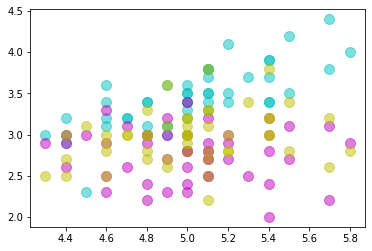

In [160]:
plt.scatter(iris_data['data'][:50,0],iris_data['data'][:50,1],s=100,c='c',alpha = 0.5)
plt.scatter(iris_data['data'][:50,0],iris_data['data'][50:100,1],s=100,c='m',alpha = 0.5)
plt.scatter(iris_data['data'][:50,0],iris_data['data'][100:150,1],s=100,c='y',alpha = 0.5)

## HW 12 plot scatter 2d ของ iris data โดย ทดลองทุก combination เช่น dimension1 x dimension2, dimension 1 x dimension 3 ... แล้วดูว่า combination ไหนดีที่สุด

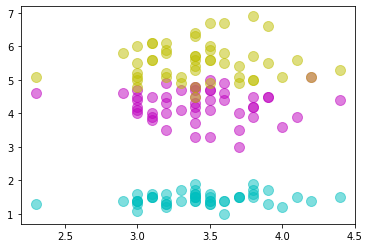

In [162]:
plt.scatter(iris_data['data'][:50,1],iris_data['data'][:50,2],s=100,c='c',alpha = 0.5)
plt.scatter(iris_data['data'][:50,1],iris_data['data'][50:100,2],s=100,c='m',alpha = 0.5)
plt.scatter(iris_data['data'][:50,1],iris_data['data'][100:150,2],s=100,c='y',alpha = 0.5)

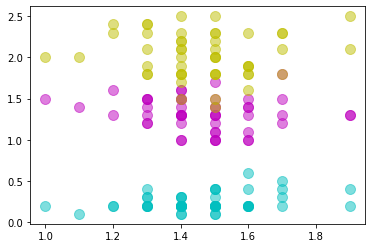

In [163]:
plt.scatter(iris_data['data'][:50,2],iris_data['data'][:50,3],s=100,c='c',alpha = 0.5)
plt.scatter(iris_data['data'][:50,2],iris_data['data'][50:100,3],s=100,c='m',alpha = 0.5)
plt.scatter(iris_data['data'][:50,2],iris_data['data'][100:150,3],s=100,c='y',alpha = 0.5)

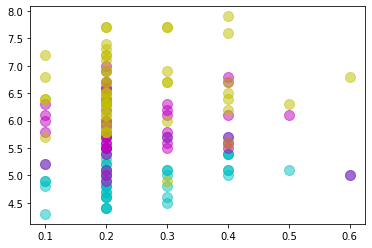

In [165]:
plt.scatter(iris_data['data'][:50,3],iris_data['data'][:50,0],s=100,c='c',alpha = 0.5)
plt.scatter(iris_data['data'][:50,3],iris_data['data'][50:100,0],s=100,c='m',alpha = 0.5)
plt.scatter(iris_data['data'][:50,3],iris_data['data'][100:150,0],s=100,c='y',alpha = 0.5)